<a href="https://colab.research.google.com/github/Nitish9973/Walmart--Confidence-Interval-and-CLT/blob/main/Walmart_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('walmart_data.txt')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275490 entries, 0 to 275489
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     275490 non-null  int64  
 1   Product_ID                  275490 non-null  object 
 2   Gender                      275490 non-null  object 
 3   Age                         275490 non-null  object 
 4   Occupation                  275489 non-null  float64
 5   City_Category               275489 non-null  object 
 6   Stay_In_Current_City_Years  275489 non-null  object 
 7   Marital_Status              275489 non-null  float64
 8   Product_Category            275489 non-null  float64
 9   Purchase                    275489 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.0+ MB


In [6]:
df.shape

(275490, 10)

In [7]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                 object
Product_Category               object
Purchase                      float64
dtype: object

In [9]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

# How many users are there in the dataset?

In [10]:
df['User_ID'].nunique()

5891

# How many products are there?

In [11]:
df['Product_ID'].nunique()

3516

# Value_counts for the following:



*  Gender
*  Age
*  Occupation
*  City_Category
*  Stay_In_Current_City_Years
*  Marital_Status
*  Product_Category









In [12]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.026879
                           18-25  0.183284
                           26-35  0.398802
                           36-45  0.199118
                           46-50  0.082805
                           51-55  0.070101
                           55+    0.039010
City_Category              A      0.269549
                           B      0.421721
                           C      0.308726
Gender                     F      0.246630
                           M      0.753370
Marital_Status             0.0    0.589702
                           1.0    0.410294
Occupation                 0.0    0.126767
                           1.0    0.086595
                           2.0    0.048550
                           3.0    0.032099
                           4.0    0.131831
                           5.0    0.021827
                           6.0    0.037119
                           7.0    0.107957
                           8.0    0.002679
                           9.0    0.011514
                           10.0   0.023050
                           11.0   0.021260
                           12.0   0.055853
                           13.0   0.014124
                           14.0   0.049621
                           15.0   0.022226
                           16.0   0.046154
                           17.0   0.072729
                           18.0   0.011848
                           19.0   0.015227
                           20.0   0.060968
Product_Category           1.0    0.256902
                           2.0    0.043715
                           3.0    0.037021
                           4.0    0.021616
                           5.0    0.277190
                           6.0    0.036880
                           7.0    0.006831
                           8.0    0.209322
                           9.0    0.000755
                           10.0   0.009383
                           11.0   0.044183
                           12.0   0.007205
                           13.0   0.010102
                           14.0   0.002737
                           15.0   0.011478
                           16.0   0.017997
                           17.0   0.001096
                           18.0   0.005583
Stay_In_Current_City_Years 0      0.135627
                           1      0.352575
                           2      0.184424
                           3      0.173012
                           4+     0.154358

# Observations



*  ~ 80% of the users are between the age 18-50 (40%: 26-35,18%: 18-25, 20%: 36-45)
*  75% of the users are Male and 25% are Female
*  60% Single, 40% Married
*  35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
*  Total of 20 product categories are there
*  There are 20 differnent types of occupations in the city










# Multivariate Analysis

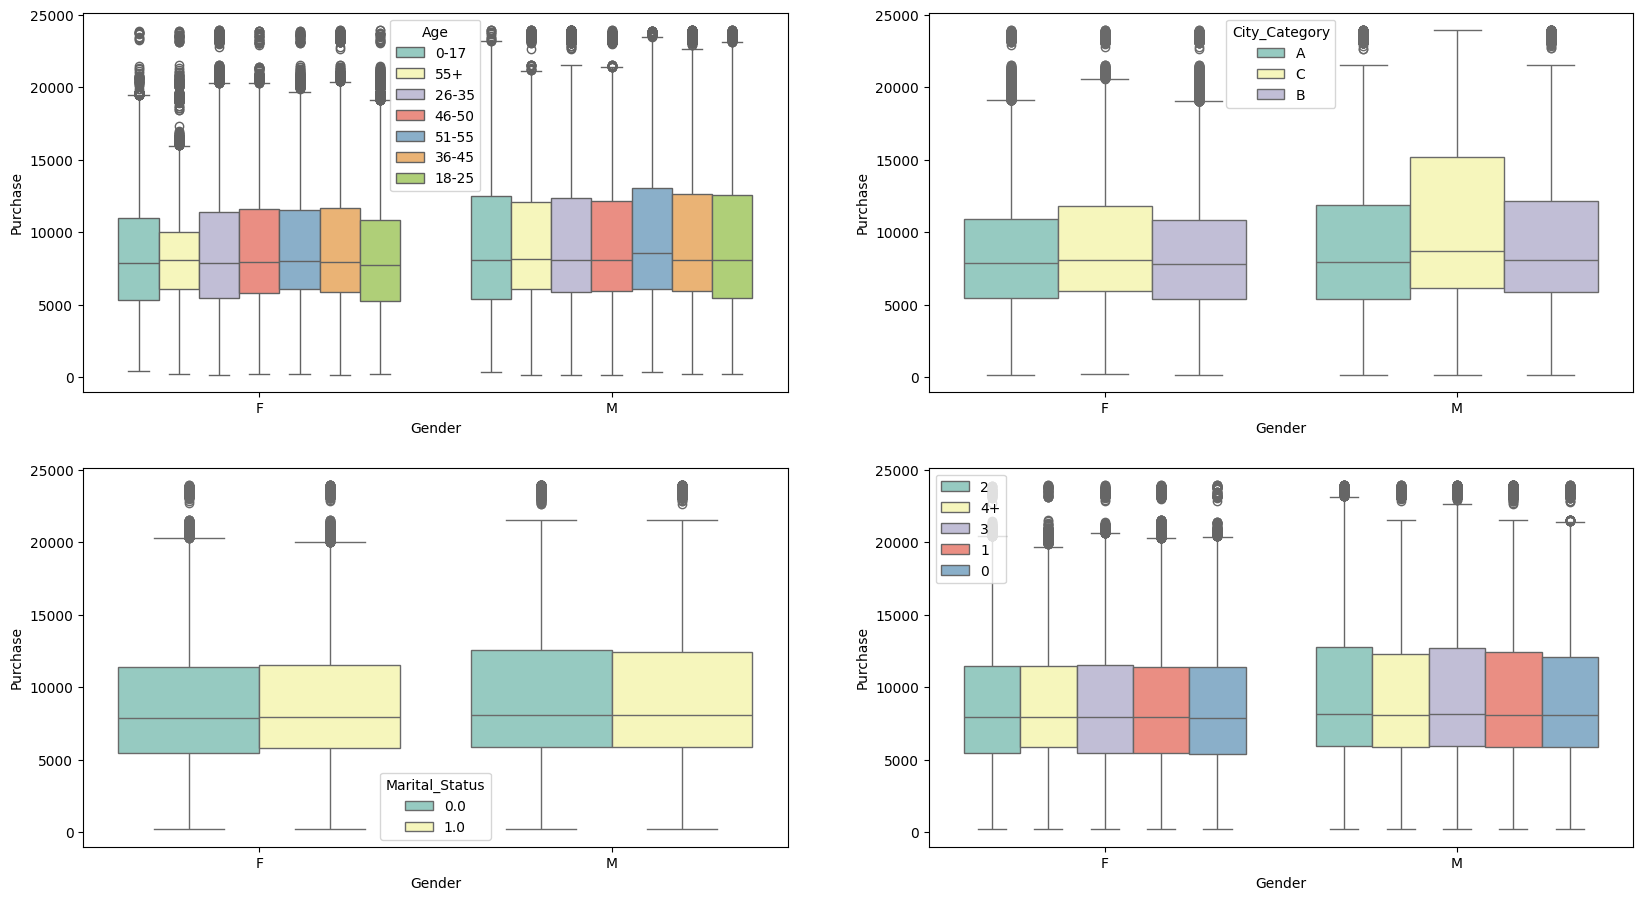

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39



**Observation**

1. Male customers spend more money than female customers

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)


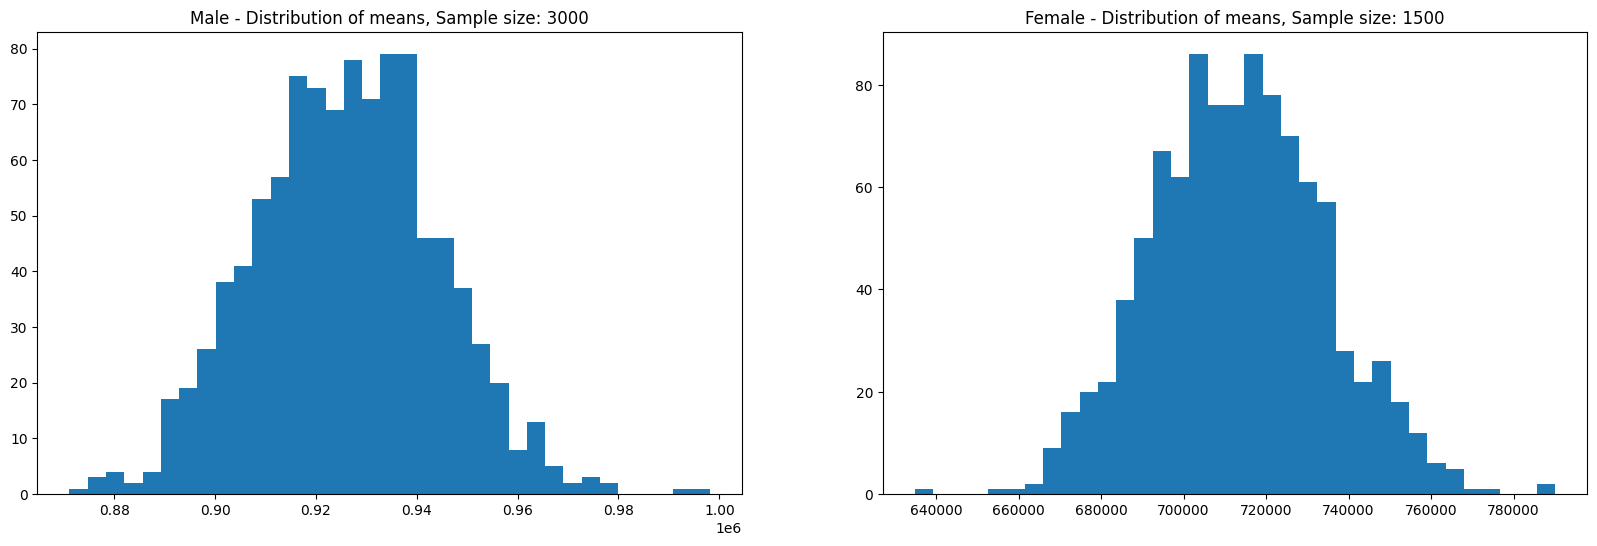

In [ ]:
 fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 926165.71
Population mean - Mean of sample means of amount spend for Female: 713388.18

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Now we can infer about the population that, 95% of the times:**

1.Average amount spend by male customer will lie in between: (895617.83, 955070.97)

2.Average amount spend by female customer will lie in between: (673254.77, 750794.02)

# Doing the same activity for married vs **unmarried**

In [ ]:
amt_df=df.groupby(['Gender','Marital_Status'])[['Purchase']].sum()
amt_df=amt_df.reset_index()
amt_df

,Gender,Marital_Status,Purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


In [ ]:
amt_df['Marital_Status'].value_counts()

Marital_Status
0    2
1    2
Name: count, dtype: int64

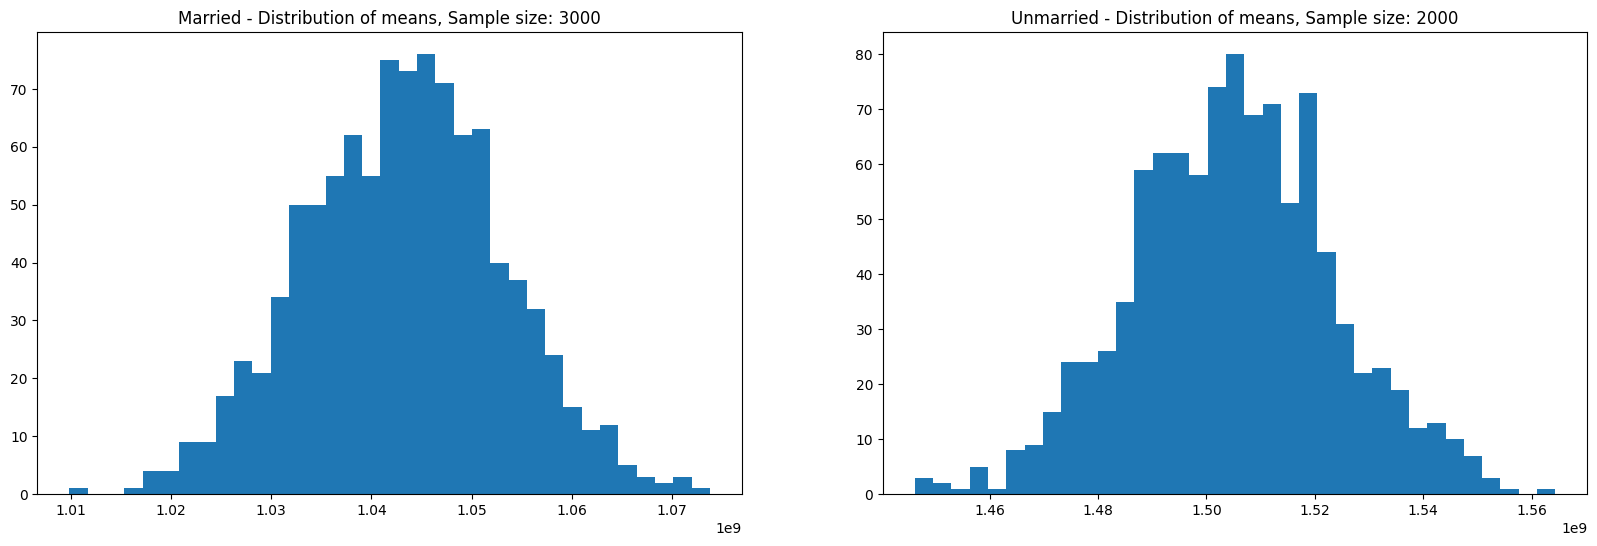

Population mean - Mean of sample means of amount spend for Married: 1043237290.04
Population mean - Mean of sample means of amount spend for Unmarried: 1504903409.44

Married - Sample mean: 1043442647.50 Sample std: 765604498.36
Unmarried - Sample mean: 1504463723.50 Sample std: 1160092956.72


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


Married confidence interval of means: (-17631052.20, 2104516347.20)
Unmarried confidence interval of means: (-103343085.64, 3112270532.64)


# **Calculating the average amount spent by Age**

In [14]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,203559.0
1,1000002,55+,336765.0
2,1000003,26-35,169875.0
3,1000004,46-50,124754.0
4,1000005,26-35,412849.0
...,...,...,...
5886,1006036,26-35,2032097.0
5887,1006037,46-50,612480.0
5888,1006038,55+,18218.0
5889,1006039,46-50,263905.0


In [15]:
amt_df['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [16]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [17]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (475032.88, 520345.10)
For age 36-45 --> confidence interval of means: (413550.26, 470372.40)
For age 18-25 --> confidence interval of means: (406862.46, 461424.31)
For age 46-50 --> confidence interval of means: (358950.73, 438915.52)
For age 51-55 --> confidence interval of means: (350585.90, 422885.06)
For age 55+ --> confidence interval of means: (240151.93, 303826.93)
For age 0-17 --> confidence interval of means: (262893.60, 353902.28)


# **Insights**
1. ~ 80% of the users are between the age 18-50 (40%:     
     26-35, 18%: 18-25, 20%: 36-45)

2. 75% of the users are Male and 25% are Female

3. 60% Single, 40% Married

4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years.

5. Total of 20 product categories are there

6. There are 20 differnent types of occupations in the city

# **Confidence Interval by Gender**
#  Now using the Central Limit Theorem for the population:

1. Average amount spend by male customers is 9,26,341.86

2. Average amount spend by female customers is 7,11,704.09
**Now we can infer about the population that, 95% of the times:**

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)

2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

**Confidence Interval by Marital_Status**

1. Married confidence interval of means: (806668.83, 880384.76)

2. Unmarried confidence interval of means: (848741.18, 912410.38)

# **Confidence Interval by Age**

1. For age 26-35 --> confidence interval of means: (945034.
  42, 1034284.21)

2. For age 36-45 --> confidence interval of means: (823347.
   80, 935983.62)

3. For age 18-25 --> confidence interval of means: (801632.
   78, 908093.46)

4. For age 46-50 --> confidence interval of means: (713505.
   63, 871591.93)

5. For age 51-55 --> confidence interval of means: (692392.
   43, 834009.42)

6. For age 55+ --> confidence interval of means: (476948.
   26, 602446.23)

7. For age 0-17 --> confidence interval of means: (527662.
   46, 710073.17)

# **Recommendations**

1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers.
3. Company can focus on selling more of these products or selling more of the products which are purchased less.

4. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

5. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.